In [ ]:
'''
Multiprocessing refers to the ability of a system to support more than one processor at the same time.
Applications in a multiprocessing system are broken to smaller routines that run independently.
The operating system allocates these threads to the processors improving performance of the system.
'''

In [ ]:
import time

start = time.perf_counter()

def do_something():
  print('Sleeping 1 second...')
  time.sleep(1)
  print('Done sleeping...')

do_something()

finish = time.perf_counter()

print(f'Finished in {round(finish - start, 2)} second(s)')

Sleeping 1 second...
Done sleeping...
Finished in 1.0 second(s)


In [ ]:
import time

start = time.perf_counter()

def do_something():
  print('Sleeping 1 second...')
  time.sleep(1)
  print('Done sleeping...')

do_something()
do_something()


finish = time.perf_counter()

print(f'Finished in {round(finish - start, 2)} second(s)')

Sleeping 1 second...
Done sleeping...
Sleeping 1 second...
Done sleeping...
Finished in 2.0 second(s)


Synchronously

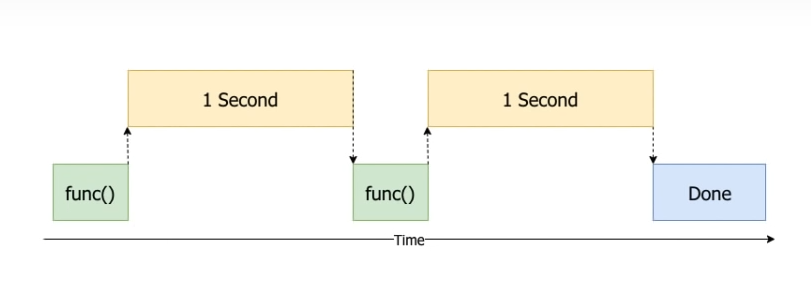

Multiprocessing

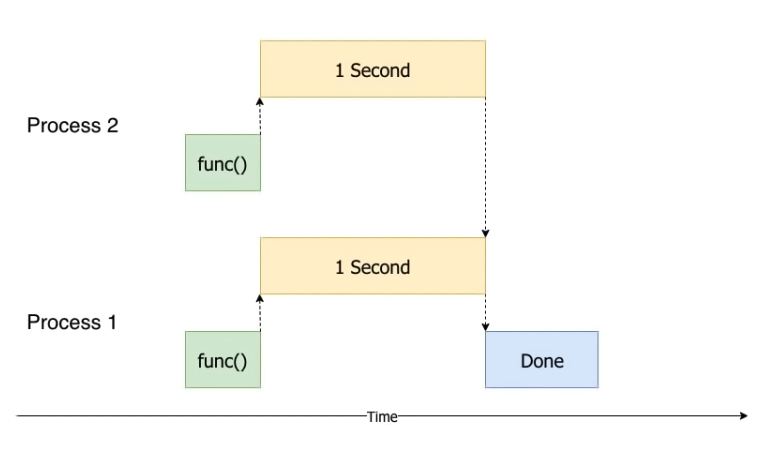

In [ ]:
import multiprocessing
import time

start = time.perf_counter()

def do_something():
  print('Sleeping 1 second...')
  time.sleep(1)
  print('Done sleeping...')

p1 = multiprocessing.Process(target = do_something)
p2 = multiprocessing.Process(target = do_something)

p1.start()
p2.start()

finish = time.perf_counter()

print(f'Finished in {round(finish - start, 2)} second(s)')

Sleeping 1 second...Finished in 0.02 second(s)

Sleeping 1 second...


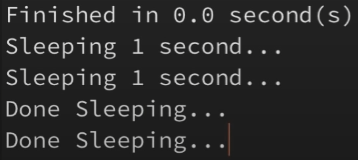

In [ ]:
import multiprocessing
import time

start = time.perf_counter()

def do_something():
  print('Sleeping 1 second...')
  time.sleep(1)
  print('Done sleeping...')

processes = []

for _ in range(10):
  p = multiprocessing.Process(target = do_something)
  p.start()
  processes.append(p)

for process in processes:
  process.join()

finish = time.perf_counter()

print(f'Finished in {round(finish - start, 2)} second(s)')

Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...Sleeping 1 second...

Sleeping 1 second...Sleeping 1 second...

Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...Sleeping 1 second...

Done sleeping...
Done sleeping...
Done sleeping...Done sleeping...

Done sleeping...
Done sleeping...
Done sleeping...
Done sleeping...
Done sleeping...
Done sleeping...
Finished in 1.18 second(s)


In [ ]:
import multiprocessing
import time

start = time.perf_counter()

def do_something(seconds):
  print(f'Sleeping for {seconds} second(s)...')
  time.sleep(seconds)
  print('Done sleeping...')

processes = []

for _ in range(10):
  p = multiprocessing.Process(target = do_something, args = [1.5])
  p.start()
  processes.append(p)

for process in processes:
  process.join()

finish = time.perf_counter()

print(f'Finished in {round(finish - start, 2)} second(s)')

Sleeping for 1.5 second(s)...
Sleeping for 1.5 second(s)...Sleeping for 1.5 second(s)...
Sleeping for 1.5 second(s)...

Sleeping for 1.5 second(s)...Sleeping for 1.5 second(s)...
Sleeping for 1.5 second(s)...
Sleeping for 1.5 second(s)...

Sleeping for 1.5 second(s)...Sleeping for 1.5 second(s)...

Done sleeping...
Done sleeping...
Done sleeping...Done sleeping...

Done sleeping...
Done sleeping...
Done sleeping...
Done sleeping...
Done sleeping...Done sleeping...

Finished in 1.67 second(s)


In [ ]:
import time
import concurrent.futures

start = time.perf_counter()

def do_something(seconds):
  print(f'Sleeping for {seconds} second(s)...')
  time.sleep(seconds)
  return 'Done sleeping...'

with concurrent.futures.ProcessPoolExecutor() as executor:
  f1 = executor.submit(do_something, 1)
  print(f1.result())

finish = time.perf_counter()

print(f'Finished in {round(finish - start, 2)} second(s)')

Sleeping for 1 second(s)...
Done sleeping...
Finished in 1.05 second(s)


In [ ]:
import time
import concurrent.futures

start = time.perf_counter()

def do_something(seconds):
  print(f'Sleeping for {seconds} second(s)...')
  time.sleep(seconds)
  return 'Done sleeping...'

with concurrent.futures.ProcessPoolExecutor() as executor:
  f1 = executor.submit(do_something, 1)
  f2 = executor.submit(do_something, 1)
  print(f1.result())
  print(f2.result())

finish = time.perf_counter()

print(f'Finished in {round(finish - start, 2)} second(s)')

Sleeping for 1 second(s)...Sleeping for 1 second(s)...

Done sleeping...
Done sleeping...
Finished in 1.08 second(s)


In [ ]:
import time
import concurrent.futures

start = time.perf_counter()

def do_something(seconds):
  print(f'Sleeping for {seconds} second(s)...')
  time.sleep(seconds)
  return f'Done sleeping for {seconds}...'

with concurrent.futures.ProcessPoolExecutor() as executor:
  secs = [5,4,3,2,1]
  results = [executor.submit(do_something, sec) for sec in secs]

  for f in concurrent.futures.as_completed(results):
    print(f.result())

finish = time.perf_counter()

print(f'Finished in {round(finish - start, 2)} second(s)')

Sleeping for 4 second(s)...Sleeping for 5 second(s)...

Sleeping for 3 second(s)...
Done sleeping for 4...
Sleeping for 2 second(s)...
Done sleeping for 5...
Sleeping for 1 second(s)...
Done sleeping for 3...
Done sleeping for 2...
Done sleeping for 1...
Finished in 8.05 second(s)


In [ ]:
import time
import concurrent.futures

start = time.perf_counter()

def do_something(seconds):
  print(f'Sleeping for {seconds} second(s)...')
  time.sleep(seconds)
  return f'Done sleeping for {seconds}...'

with concurrent.futures.ProcessPoolExecutor() as executor:
  secs = [5,4,3,2,1]
  results = executor.map(do_something, secs)

  for result in results:
    print(result)

finish = time.perf_counter()

print(f'Finished in {round(finish - start, 2)} second(s)')

Sleeping for 4 second(s)...Sleeping for 5 second(s)...

Sleeping for 3 second(s)...
Sleeping for 2 second(s)...
Done sleeping for 5...
Done sleeping for 4...
Sleeping for 1 second(s)...
Done sleeping for 3...
Done sleeping for 2...
Done sleeping for 1...
Finished in 8.06 second(s)


In [ ]:
import time
import concurrent.futures

start = time.perf_counter()

def do_something(seconds):
  print(f'Sleeping for {seconds} second(s)...')
  time.sleep(seconds)
  return f'Done sleeping for {seconds}...'

with concurrent.futures.ProcessPoolExecutor() as executor:
  secs = [5,4,3,2,1]
  results = executor.map(do_something, secs)

finish = time.perf_counter()

print(f'Finished in {round(finish - start, 2)} second(s)')

Sleeping for 5 second(s)...Sleeping for 4 second(s)...

Sleeping for 3 second(s)...
Sleeping for 2 second(s)...
Sleeping for 1 second(s)...
Finished in 8.07 second(s)


In [ ]:
#Using multithreading to download images

import requests
import time

img_urls = [
    'https://images.unsplash.com/photo-1516117172878-fd2c41f4a759',
    'https://images.unsplash.com/photo-1532009324734-20a7a5813719',
    'https://images.unsplash.com/photo-1524429656589-6633a470097c',
    'https://images.unsplash.com/photo-1530224264768-7ff8c1789d79',
    'https://images.unsplash.com/photo-1564135624576-c5c88640f235',
    'https://images.unsplash.com/photo-1541698444083-023c97d3f4b6',
    'https://images.unsplash.com/photo-1522364723953-452d3431c267',
    'https://images.unsplash.com/photo-1513938709626-033611b8cc03',
    'https://images.unsplash.com/photo-1507143550189-fed454f93097',
    'https://images.unsplash.com/photo-1493976040374-85c8e12f0c0e',
    'https://images.unsplash.com/photo-1504198453319-5ce911bafcde',
    'https://images.unsplash.com/photo-1530122037265-a5f1f91d3b99',
    'https://images.unsplash.com/photo-1516972810927-80185027ca84',
    'https://images.unsplash.com/photo-1550439062-609e1531270e',
    'https://images.unsplash.com/photo-1549692520-acc6669e2f0c'
]

t1 = time.perf_counter()

for img_url in img_urls:
  img_bytes = requests.get(img_url).content
  img_name = img_url.split('/')[3]
  img_name = f'{img_name}.jpg'
  with open(img_name, 'wb') as img_file:
        img_file.write(img_bytes)
        print(f'{img_name} was downloaded...')

t2 = time.perf_counter()

print(f'Finished in {t2-t1} seconds')

photo-1516117172878-fd2c41f4a759.jpg was downloaded...
photo-1532009324734-20a7a5813719.jpg was downloaded...
photo-1524429656589-6633a470097c.jpg was downloaded...
photo-1530224264768-7ff8c1789d79.jpg was downloaded...
photo-1564135624576-c5c88640f235.jpg was downloaded...
photo-1541698444083-023c97d3f4b6.jpg was downloaded...
photo-1522364723953-452d3431c267.jpg was downloaded...
photo-1513938709626-033611b8cc03.jpg was downloaded...
photo-1507143550189-fed454f93097.jpg was downloaded...
photo-1493976040374-85c8e12f0c0e.jpg was downloaded...
photo-1504198453319-5ce911bafcde.jpg was downloaded...
photo-1530122037265-a5f1f91d3b99.jpg was downloaded...
photo-1516972810927-80185027ca84.jpg was downloaded...
photo-1550439062-609e1531270e.jpg was downloaded...
photo-1549692520-acc6669e2f0c.jpg was downloaded...
Finished in 4.4987325259999125 seconds


In [ ]:
import time
from PIL import Image, ImageFilter

img_names = [
    'photo-1516117172878-fd2c41f4a759.jpg',
    'photo-1532009324734-20a7a5813719.jpg',
    'photo-1524429656589-6633a470097c.jpg',
    'photo-1530224264768-7ff8c1789d79.jpg',
    'photo-1564135624576-c5c88640f235.jpg',
    'photo-1541698444083-023c97d3f4b6.jpg',
]

t1 = time.perf_counter()

size = (1200, 1200)

for img_name in img_names:
    img = Image.open(img_name)

    img = img.filter(ImageFilter.GaussianBlur(15))

    img.thumbnail(size)
    img.save(f'{img_name}')
    print(f'{img_name} was processed...')

t2 = time.perf_counter()

print(f'Finished in {t2-t1} seconds')

photo-1516117172878-fd2c41f4a759.jpg was processed...
photo-1532009324734-20a7a5813719.jpg was processed...
photo-1524429656589-6633a470097c.jpg was processed...
photo-1530224264768-7ff8c1789d79.jpg was processed...
photo-1564135624576-c5c88640f235.jpg was processed...
photo-1541698444083-023c97d3f4b6.jpg was processed...
Finished in 9.497106851999888 seconds


In [ ]:
import time
from PIL import Image, ImageFilter
import concurrent.futures

img_names = [
    'photo-1516117172878-fd2c41f4a759.jpg',
    'photo-1532009324734-20a7a5813719.jpg',
    'photo-1524429656589-6633a470097c.jpg',
    'photo-1530224264768-7ff8c1789d79.jpg',
    'photo-1564135624576-c5c88640f235.jpg',
    'photo-1541698444083-023c97d3f4b6.jpg',
]

t1 = time.perf_counter()

size = (1200, 1200)

def process_image(img_name):
    img = Image.open(img_name)

    img = img.filter(ImageFilter.GaussianBlur(15))

    img.thumbnail(size)
    img.save(f'{img_name}')
    print(f'{img_name} was processed...')

with concurrent.futures.ProcessPoolExecutor() as executor:
  executor.map(process_image, img_names)

t2 = time.perf_counter()

print(f'Finished in {t2-t1} seconds')

photo-1532009324734-20a7a5813719.jpg was processed...
photo-1516117172878-fd2c41f4a759.jpg was processed...
photo-1524429656589-6633a470097c.jpg was processed...
photo-1530224264768-7ff8c1789d79.jpg was processed...
photo-1564135624576-c5c88640f235.jpg was processed...
photo-1541698444083-023c97d3f4b6.jpg was processed...
Finished in 0.4044134480000139 seconds
